In [1]:
%matplotlib notebook

import matplotlib.pyplot as plt
from IPython.display import display
import neurokit2 as nk
import pandas as pd
import numpy as np
import seaborn as sns
import os
import pickle

#Change this for each participant
part_number = '201'

# Set matplotlib parameters for displaying graphs
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = [9, 4.5]  # Bigger images
plt.rcParams['font.size']= 14
pd.set_option('display.max_columns', None)

save_dir = '../data/part'+part_number+'/figures/'

p = '../data/part'+part_number+'/part'+part_number+'_pilot_ecg_signals.p'
ecg = pickle.load(open(p,"rb"))
eda = pickle.load(open('../data/part'+part_number+'/part'+part_number+'_pilot_eda_signals.p',"rb"))
rsp = pickle.load(open('../data/part'+part_number+'/part'+part_number+'_pilot_rsp_signals.p',"rb"))
baseline_fn = '../data/part'+part_number+'/part'+part_number+'_baseline_ecg_signals.p'
baseline2_fn = '../data/part'+part_number+'/part'+part_number+'_baseline_eda_signals.p'
baseline3_fn = '../data/part'+part_number+'/part'+part_number+'_baseline_rsp_signals.p'
ecg_baseline = pickle.load(open(baseline_fn,"rb"))
eda_baseline = pickle.load(open(baseline2_fn,"rb"))
rsp_baseline = pickle.load(open(baseline3_fn,"rb"))

data_file = '../data/part'+part_number+'/part'+part_number+'_pilot.acq'
rate = 2000

data, sampling_rate = nk.read_acqknowledge(data_file)
data = data.rename(columns={"RSP, X, RSPEC-R": "RSP", "DTU100 - Trigger View, AMI / HLT - A11": "TRIG",
                            "EDA, X, PPGED-R": "EDA", "ECG, X, RSPEC-R": "ECG"})

timestamps=np.loadtxt('../support/trigger timestamps/trigger timestamps.csv',dtype='int',delimiter=',')
start_times = timestamps[int(part_number[-2:]) - 1]
feedback_times = timestamps[int(part_number[-2:]) - 1 + 15]

taskloads_all = np.loadtxt('../support/taskload settings/taskload settings.csv',dtype='int',delimiter=',',encoding='UTF-8')
taskload_settings = taskloads_all[int(part_number[-2:]) - 1]

durations = [100,100,100,100,100,100,100,100,100,100,100,100]
#durations = [633339, 472624, 462436, 479671, 443789, 460186, 451913, 467455, 465081, 407503, 453908, 453551]

events = {}
events['onset'] = start_times
events['duration'] = durations
events['label']=  [1,2,3,4,5,6,7,8,9,10,11,12]
events['condition'] =  taskload_settings
#events['trust'] = trust_settings DOES NOT WORK!

events_feedback = {}
events_feedback['onset'] = feedback_times
events_feedback['duration'] = durations
events_feedback['label']=  [1,2,3,4,5,6,7,8,9,10,11,12]
events_feedback['condition'] =  taskload_settings

ecg_pilot_interval = nk.epochs_create(ecg, events, sampling_rate=rate, epochs_start=0, epochs_end=50)
eda_pilot_interval = nk.epochs_create(eda, events, sampling_rate=rate, epochs_start=0, epochs_end=50)
rsp_pilot_interval = nk.epochs_create(rsp, events, sampling_rate=rate, epochs_start=0, epochs_end=50)

ecg_trust_interval = nk.epochs_create(ecg,events,sampling_rate=rate,epochs_start=50,epochs_end=70)
eda_trust_interval = nk.epochs_create(eda,events,sampling_rate=rate,epochs_start=50,epochs_end=70)
rsp_trust_interval = nk.epochs_create(rsp,events,sampling_rate=rate,epochs_start=50,epochs_end=70)

ecg_trust_event = nk.epochs_create(ecg,events_feedback,sampling_rate=rate,epochs_start=-5,epochs_end=20)
eda_trust_event = nk.epochs_create(eda,events_feedback,sampling_rate=rate,epochs_start=-5,epochs_end=20)
rsp_trust_event = nk.epochs_create(rsp,events_feedback,sampling_rate=rate,epochs_start=-5,epochs_end=20)

pi_high_tl = {}
hc=1
pi_med_tl = {}
mc=1
pi_low_tl = {}
lc=1
for i in range(1,13):
    if (ecg_pilot_interval[i]['Condition'].iloc[0] == 4.0):
        pi_high_tl[hc] = ecg_pilot_interval[i]
        hc+=1
    if (ecg_pilot_interval[i]['Condition'].iloc[0] == 3.0):
        pi_med_tl[mc] = ecg_pilot_interval[i]
        mc+=1
    if (ecg_pilot_interval[i]['Condition'].iloc[0] == 2.0):
        pi_low_tl[lc] = ecg_pilot_interval[i]
        lc+=1

for i in range(1,13):
    if (eda_pilot_interval[i]['Condition'].iloc[0] == 4.0):
        pi_high_tl[hc] = eda_pilot_interval[i]
        hc+=1
    if (eda_pilot_interval[i]['Condition'].iloc[0] == 3.0):
        pi_med_tl[mc] = eda_pilot_interval[i]
        mc+=1
    if (eda_pilot_interval[i]['Condition'].iloc[0] == 2.0):
        pi_low_tl[lc] = eda_pilot_interval[i]
        lc+=1
            
for i in range(1,13):
    if (rsp_pilot_interval[i]['Condition'].iloc[0] == 4.0):
        pi_high_tl[hc] = rsp_pilot_interval[i]
        hc+=1
    if (rsp_pilot_interval[i]['Condition'].iloc[0] == 3.0):
        pi_med_tl[mc] = rsp_pilot_interval[i]
        mc+=1
    if (rsp_pilot_interval[i]['Condition'].iloc[0] == 2.0):
        pi_low_tl[lc] = rsp_pilot_interval[i]
        lc+=1
        
x_axis_pilot = np.linspace(0, ecg_pilot_interval[1].shape[0]/ sampling_rate, ecg_pilot_interval[1].shape[0])

<IPython.core.display.Javascript object>


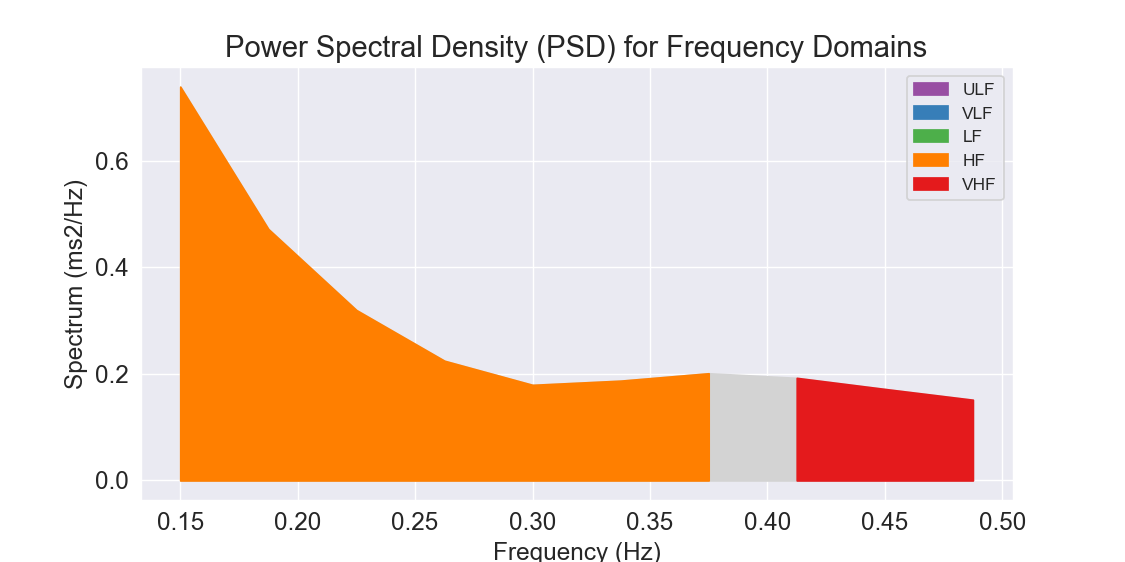

,HRV_ULF,HRV_VLF,HRV_LF,HRV_HF,HRV_VHF,HRV_LFHF,HRV_LFn,HRV_HFn,HRV_LnHF
0,NaN,NaN,NaN,0.069459,0.012882,NaN,NaN,0.84355,-2.667024


In [11]:
index = 1
peaks_all = pi_high_tl[index]['ECG_R_Peaks'][:]
nk.hrv_frequency(peaks_all, sampling_rate=sampling_rate, show=True)

<IPython.core.display.Javascript object>


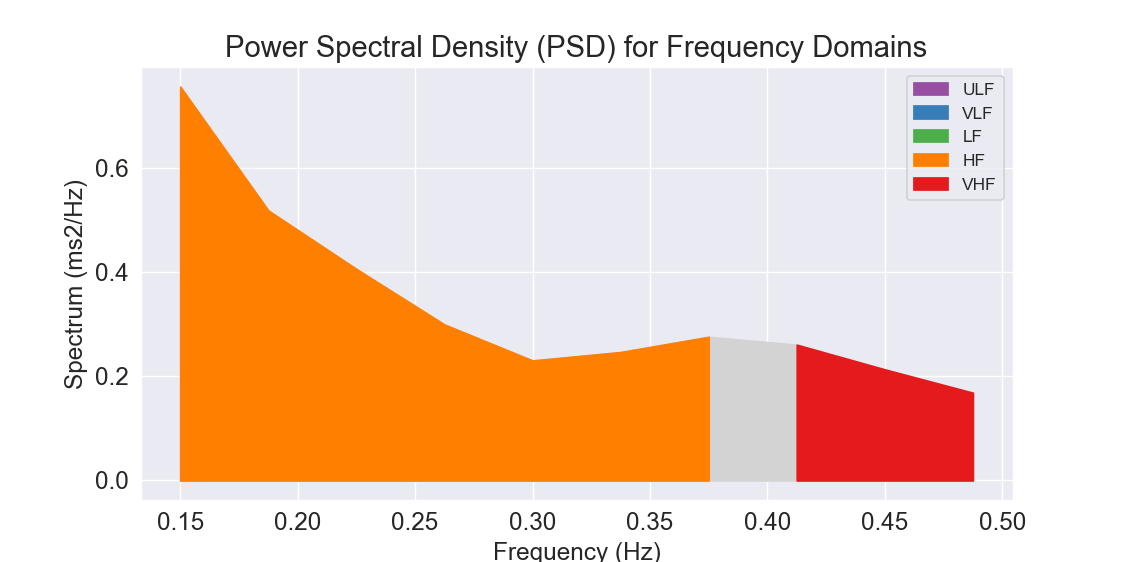

,HRV_ULF,HRV_VLF,HRV_LF,HRV_HF,HRV_VHF,HRV_LFHF,HRV_LFn,HRV_HFn,HRV_LnHF
0,NaN,NaN,NaN,0.083091,0.016035,NaN,NaN,0.838238,-2.48782


In [12]:
peaks_f40 = pi_high_tl[index]['ECG_R_Peaks'][:40]
nk.hrv_frequency(peaks_f40, sampling_rate=sampling_rate, show=True)

<IPython.core.display.Javascript object>


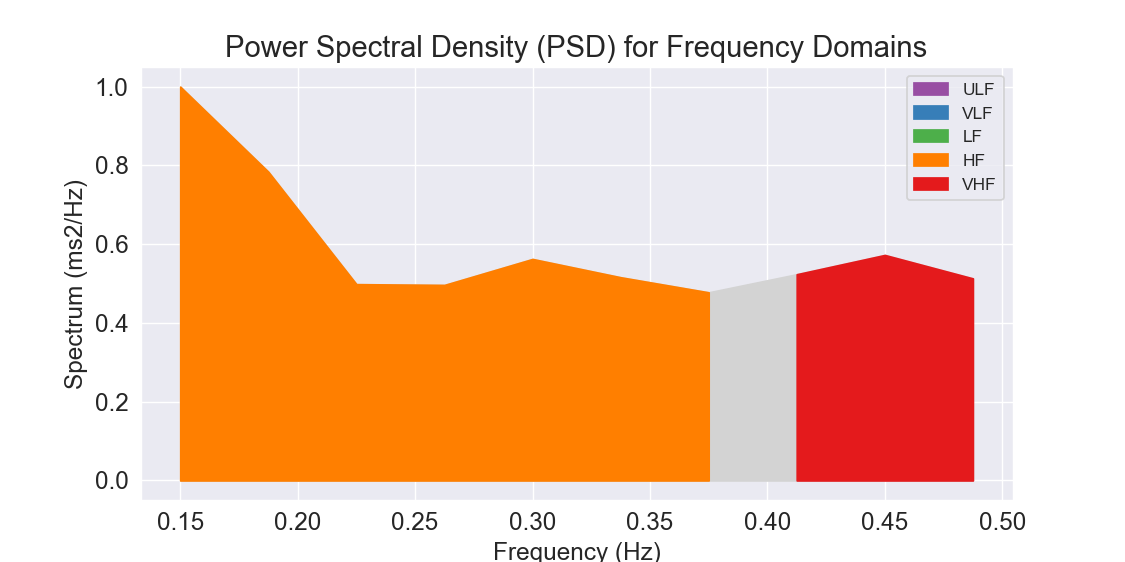

,HRV_ULF,HRV_VLF,HRV_LF,HRV_HF,HRV_VHF,HRV_LFHF,HRV_LFn,HRV_HFn,HRV_LnHF
0,NaN,NaN,NaN,0.134855,0.040912,NaN,NaN,0.767236,-2.003552


In [13]:
peaks_l40 = pi_high_tl[index]['ECG_R_Peaks'][10:]
nk.hrv_frequency(peaks_l40, sampling_rate=sampling_rate, show=True)

<IPython.core.display.Javascript object>


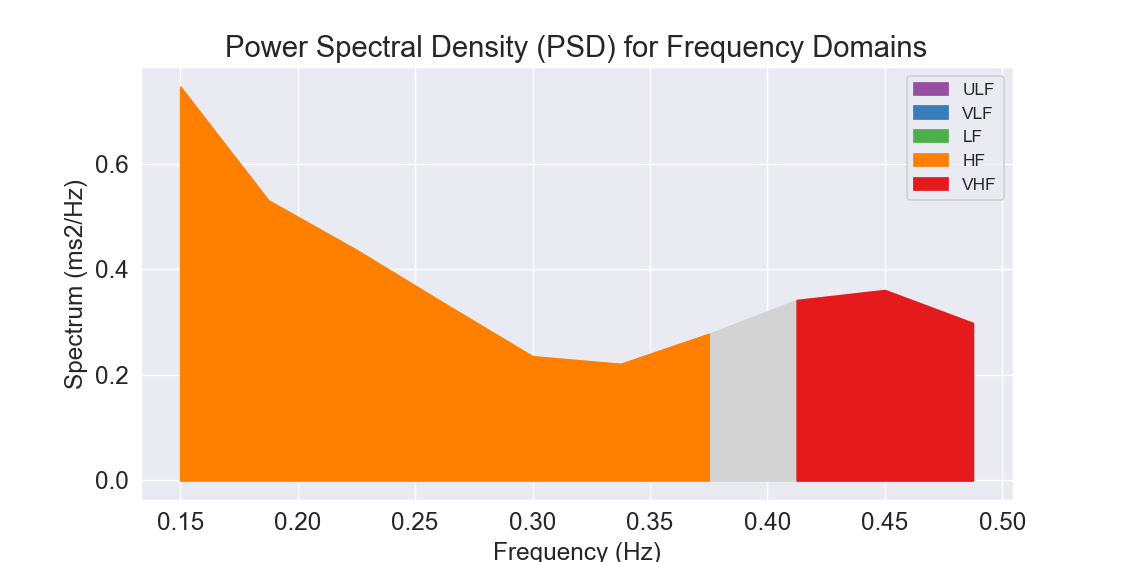

,HRV_ULF,HRV_VLF,HRV_LF,HRV_HF,HRV_VHF,HRV_LFHF,HRV_LFn,HRV_HFn,HRV_LnHF
0,NaN,NaN,NaN,0.085189,0.025539,NaN,NaN,0.769352,-2.462885


In [22]:
r_peaks_inbetween = pd.concat([pi_high_tl[index]['ECG_R_Peaks'][:20], pi_high_tl[index]['ECG_R_Peaks'][30:]])
peaks_inbetween = r_peaks_inbetween
nk.hrv_frequency(peaks_inbetween, sampling_rate=sampling_rate, show=True)

In [ ]:
fig, ecg_pilot_axs = plt.subplots(2,2 ,figsize=(20,10))
ecg_pilot_axs[0,0].plot(x_axis_pilot, ecg_pilot_interval[1]['ECG_Raw'])
ecg_pilot_axs[0,0].axvline(x=16,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[0,0].axvline(x=9,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[0,0].axvline(x=17,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[0,0].axvline(x=28,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[0,0].axvline(x=30,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[0,0].axvline(x=42,linewidth=2, color='r',linestyle='dashed',alpha=.5)

ecg_pilot_axs[0,0].set_ylabel('Voltage')
ecg_pilot_axs[0,0].set_title('Trial 1')
#ecg_pilot_axs[0,0].set_ylim(-.5,1)

ecg_pilot_axs[0,1].plot(x_axis_pilot, ecg_pilot_interval[2]['ECG_Raw'])
ecg_pilot_axs[0,1].axvline(x=17,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[0,1].axvline(x=22,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[0,1].axvline(x=34,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[0,1].axvline(x=43,linewidth=2, color='r',linestyle='dashed',alpha=.5)

ecg_pilot_axs[0,1].axvline(x=9,linewidth=2, color='r',linestyle='dashed',alpha=.5)


ecg_pilot_axs[0,1].set_title('Trial 2')
#ecg_pilot_axs[0,1].set_ylim(-.5,1)

ecg_pilot_axs[0,2].plot(x_axis_pilot, ecg_pilot_interval[3]['ECG_Raw'])
ecg_pilot_axs[0,2].axvline(x=20,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[0,2].axvline(x=26,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[0,2].axvline(x=34,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[0,2].axvline(x=35,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[0,2].axvline(x=41,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[0,2].axvline(x=47,linewidth=2, color='r',linestyle='dashed',alpha=.5)


ecg_pilot_axs[0,2].set_title('Trial 3')
#ecg_pilot_axs[0,2].set_ylim(-.5,1)

ecg_pilot_axs[1,0].plot(x_axis_pilot, ecg_pilot_interval[4]['ECG_Raw'])
ecg_pilot_axs[1,0].axvline(x=9,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[1,0].axvline(x=10,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[1,0].axvline(x=18,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[1,0].axvline(x=25,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[1,0].axvline(x=26,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[1,0].axvline(x=34,linewidth=2, color='r',linestyle='dashed',alpha=.5)

ecg_pilot_axs[1,0].axvline(x=42,linewidth=2, color='r',linestyle='dashed',alpha=.5)

ecg_pilot_axs[1,0].set_ylabel('Voltage')
ecg_pilot_axs[1,0].set_title('Trial 4')
#ecg_pilot_axs[1,0].set_ylim(-.5,1)

ecg_pilot_axs[1,1].plot(x_axis_pilot, ecg_pilot_interval[5]['ECG_Raw'])
ecg_pilot_axs[1,1].axvline(x=9,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[1,1].axvline(x=8,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[1,1].axvline(x=18,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[1,1].axvline(x=23,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[1,1].axvline(x=26,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[1,1].axvline(x=34,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[1,1].axvline(x=39,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[1,1].axvline(x=42,linewidth=2, color='r',linestyle='dashed',alpha=.5)


ecg_pilot_axs[1,1].set_title('Trial 5')
#ecg_pilot_axs[1,1].set_ylim(-.5,1)

ecg_pilot_axs[1,2].plot(x_axis_pilot, ecg_pilot_interval[6]['ECG_Raw'])
ecg_pilot_axs[1,2].axvline(x=9,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[1,2].axvline(x=18,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[1,2].axvline(x=26,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[1,2].axvline(x=34,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[1,2].axvline(x=40,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[1,2].axvline(x=45,linewidth=2, color='r',linestyle='dashed',alpha=.5)


ecg_pilot_axs[1,2].set_title('Trial 6')
#ecg_pilot_axs[1,2].set_ylim(-.5,1)

ecg_pilot_axs[2,0].plot(x_axis_pilot, ecg_pilot_interval[7]['ECG_Raw'])
ecg_pilot_axs[2,0].axvline(x=9,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[2,0].axvline(x=17,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[2,0].axvline(x=24,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[2,0].axvline(x=27,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[2,0].axvline(x=34,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[2,0].axvline(x=43,linewidth=2, color='r',linestyle='dashed',alpha=.5)


ecg_pilot_axs[2,0].set_ylabel('Voltage')
ecg_pilot_axs[2,0].set_title('Trial 7')
#ecg_pilot_axs[2,0].set_ylim(-.5,1)

ecg_pilot_axs[2,1].plot(x_axis_pilot, ecg_pilot_interval[8]['ECG_Raw'])
ecg_pilot_axs[2,1].axvline(x=9,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[2,1].axvline(x=11,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[2,1].axvline(x=27,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[2,1].axvline(x=31,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[2,1].axvline(x=42,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[2,1].axvline(x=44,linewidth=2, color='r',linestyle='dashed',alpha=.5)



ecg_pilot_axs[2,1].set_title('Trial 8')
#ecg_pilot_axs[2,1].set_ylim(-.5,1)

ecg_pilot_axs[2,2].plot(x_axis_pilot, ecg_pilot_interval[9]['ECG_Raw'])
ecg_pilot_axs[2,2].axvline(x=9,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[2,2].axvline(x=17,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[2,2].axvline(x=18,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[2,2].axvline(x=24,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[2,2].axvline(x=26,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[2,2].axvline(x=34,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[2,2].axvline(x=49,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[2,2].axvline(x=35,linewidth=2, color='r',linestyle='dashed',alpha=.5)


ecg_pilot_axs[2,2].set_title('Trial 9')
#ecg_pilot_axs[2,2].set_ylim(-.5,1)

ecg_pilot_axs[3,0].plot(x_axis_pilot, ecg_pilot_interval[10]['ECG_Raw'])
ecg_pilot_axs[3,0].set_xlabel('Sec')
ecg_pilot_axs[3,0].set_ylabel('Voltage')
ecg_pilot_axs[3,0].set_title('Trial 10')
ecg_pilot_axs[3,0].axvline(x=9,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[3,0].axvline(x=17,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[3,0].axvline(x=26,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[3,0].axvline(x=34,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[3,0].axvline(x=43,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[3,0].axvline(x=40,linewidth=2, color='r',linestyle='dashed',alpha=.5)


#ecg_pilot_axs[3,0].set_ylim(-.5,1)

ecg_pilot_axs[3,1].plot(x_axis_pilot, ecg_pilot_interval[11]['ECG_Raw'])
ecg_pilot_axs[3,1].set_xlabel('Sec')

ecg_pilot_axs[3,1].set_title('Trial 11')
ecg_pilot_axs[3,1].axvline(x=10,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[3,1].axvline(x=18,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[3,1].axvline(x=20,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[3,1].axvline(x=26,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[3,1].axvline(x=34,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[3,1].axvline(x=35,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[3,1].axvline(x=43,linewidth=2, color='r',linestyle='dashed',alpha=.5)

#ecg_pilot_axs[3,1].set_ylim(-.5,1)

ecg_pilot_axs[3,2].plot(x_axis_pilot, ecg_pilot_interval[12]['ECG_Raw'])
ecg_pilot_axs[3,2].set_xlabel('Sec')
ecg_pilot_axs[3,2].set_title('Trial 12')
#ecg_pilot_axs[3,2].set_ylim(-.5,1)
ecg_pilot_axs[3,2].axvline(x=8,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[3,2].axvline(x=9,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[3,2].axvline(x=17,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[3,2].axvline(x=18,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[3,2].axvline(x=26,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[3,2].axvline(x=28,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[3,2].axvline(x=34,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[3,2].axvline(x=43,linewidth=2, color='r',linestyle='dashed',alpha=.5)

ecg_pilot_axs[3,2].axvline(x=44,linewidth=2, color='r',linestyle='dashed',alpha=.5)
ecg_pilot_axs[3,2].axvline(x=35,linewidth=2, color='r',linestyle='dashed',alpha=.5)

fig.tight_layout(pad=0)
title=part_number+' ECG Piloting Interval Trial Breakdown'
fig.suptitle(title)
plt.show()
#plt.savefig(save_dir+title)
